# Homework 2- Francesco Ortu


## Ex 1
Let's define the following events :
- $D$ the event of been affected from the disease. 
- $SP$ the event of result postitive to the test (___screen postive___). 

We know that:
$$ \mathbb{P}(D)=\dfrac{3}{1000}$$
$$\mathbb{P}(SP | D)=\dfrac{95}{100}$$
$$\mathbb{P}(SP | ¬D)=\dfrac{1}{10}$$
So
$$\mathbb{P}(SP)=\mathbb{P}(SP|D)\mathbb{P}(D)+\mathbb{P}(SP|¬D)\mathbb{P}(¬D)=\dfrac{95 \cdot 3}{100 \cdot 1000}+ \dfrac{1 \cdot 997}{10 \cdot 1000}=0.1 $$
and
$$ \mathbb{P}(D|SP)=\dfrac{\mathbb{P}(SP|D)\mathbb{P}(D)}{\mathbb{P}(SP)}= 0.0285 $$

## Ex 2


In [7]:
import torch
import pyro
import pyro.distributions as dist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def compute_ecdf( x, sample, n_samples):
    """
    Compute the empirical cumulative distribution function of a distribution.
    """
    cdf = torch.sum(sample < x) / n_samples
    return cdf.item()

def ecdf(Dist, x, n_samples):
    sample = torch.stack( [pyro.sample("sample", Dist) for i in range(n_samples)] )
    z = np.linspace(0, sample.max()*2, 100)
    y = np.zeros(100)
    for i in range(100):
        y[i] = compute_ecdf(z[i], sample, n_samples)
    plt.plot(z, y, color='red')
    plt.show()
    return compute_ecdf(x, sample, n_samples)

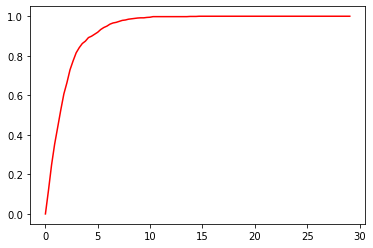

0.6470000147819519

In [322]:
ecdf(dist.Exponential(0.5), 2, 1000)

## Ex 3

### 1.
Using the cdf from the previous exercise, verify that the prior probability that $ \mu \in [155,175] $ is approximately $95\%$ :

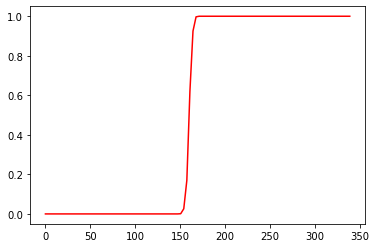

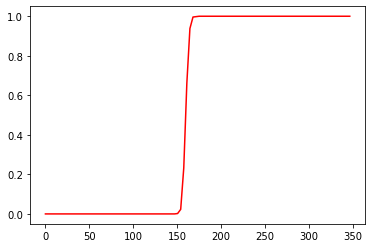

0.9470000006258488


In [323]:
Dist = dist.Normal(160,3)
prob = ecdf(Dist, 175, 1000)*(1-ecdf(Dist, 155, 1000))
print(prob)

### 2.

The likelihood is:
$$ L(x_1,\dots,x_n, \mu)= f(x | \mu ) = \dfrac{1}{\sigma^n (2\pi)^{\frac{n}{2}}}e^{ -\sum_{i=1}^{n} \frac{1}{2} \left(  \frac{x_i - \mu }{\sigma}  \right)^2 } $$
so

$$ f(\mu)f(x| \mu) = \dfrac{1}{\sigma_0\sigma^{n} (2\pi)^{\frac{n+1}{2}}}e^{ -\sum_{i=1}^{n} \frac{1}{2} \left(  \frac{x_i - \mu }{\sigma}  \right)^2 -\frac{1}{2} \left(    \frac{\mu-\mu_0}{\sigma_0}  \right)^2 } $$
$$ \propto e^{  \frac{1}{2\sigma_{0}^2} (-\mu^2 - \mu_{0}^2 + 2\mu_0 \mu )     -\frac{1}{2 \sigma^2} \sum \left( x_{i}^2 - 2x_i \mu +\mu^2    \right) }  $$ 
$$ \propto  e^{  -\frac{-\mu^2 ( \sigma^2 + n \sigma_{0}^2 ) + 2\mu ( \mu_0\sigma^2 + \sigma_{0}^2 x_1 + \cdots + \sigma_{0}^2 x_n ) - ( \sigma_{0}^2 \mu^2 + \sigma_{0}^2 x_{1}^2 + \cdots + \sigma_{0}^2 x_{n}^2 ) }{ 2 \sigma_{0}^2 \sigma^2  } }  $$
$$  \propto  exp\left[ - \dfrac{ \left( \mu -\frac{ \mu_0 \sigma^2 + \sum \sigma_{0}^2 x_i }{\sigma^2 + n \sigma_{0}^2 } \right) }{2 \frac{\sigma_{0}^2 \sigma^2}{\sigma^2 + n\sigma_{0}^2 }  }  \right]  $$ 

### 3.
Using the calculation of the previous point, replacing with $ \mu_0=160, \sigma_0=3, \sigma=6 $, we obtain that the posterior is distribuited accordingly to $ N(166,2) $.

          prior   posterior
0    159.979965  168.559357
1    159.012802  165.801010
2    156.893524  165.459793
3    158.105728  168.698273
4    159.882614  165.196838
..          ...         ...
995  157.582809  169.114548
996  163.329132  164.992722
997  165.690369  166.311874
998  164.010666  164.906738
999  163.504822  165.478714

[1000 rows x 2 columns]


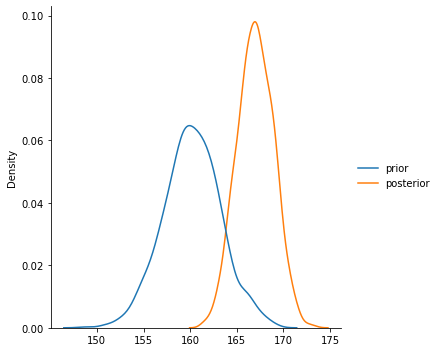

In [9]:
normal_1 =  dist.Normal(160, 3)
normal_2 = dist.Normal(167, 2)

prior_sample = normal_1.sample((1000,))
posterior_sample = normal_2.sample((1000,))

# print(prior_sample)
data = pd.DataFrame({"prior":prior_sample, "posterior":posterior_sample})
# plot prior
sns.displot(data, kind="kde", color="red")


## Ex 4
The PMF of a r.v. following a geometric distribution of parameter $  \theta $ is :
$$ f(x)= (1-\theta)^{x -1 } \theta $$
So, the likelihood is:
$$ L(x,\theta) = \prod_{i}^{n} (1-\theta)^{x_i -1 } \theta = (1-\theta)^{\prod_{i}^{n} x_i - n } \theta^n $$

The PMF of beta distribution is:
$$\pi(\theta) = \dfrac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha -1}(1-\theta)^{\beta-1}  $$

Now it's hold that the posterior distribution is :
$$ L(x,\theta)\pi(\theta) \propto  \theta^{(\alpha+n)-1} (1-\theta)^{(\beta +\prod_{i}^{n} x_i - n) -1 } \propto  \theta^{\alpha' -1} (1-\theta)^{\beta' -1} $$
that is still a beta distribution with parameters $ \alpha',\beta'$.